In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import keras
import math

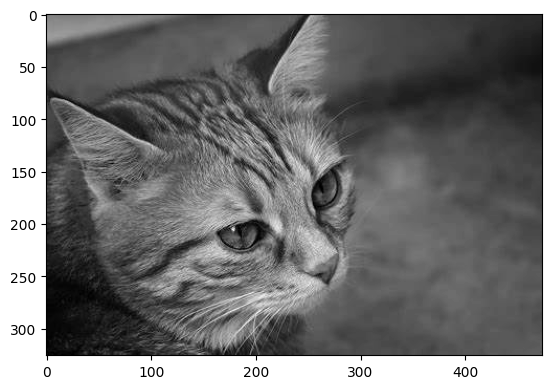

In [2]:
image=cv2.imread('/content/cat.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

In [3]:
def apply_filter(image, mask):
  row,column = image.shape
  mw, mh = mask.shape
  filtered_image = np.zeros(image.shape)
  for i in range(row-mw+1):
    for j  in range(column - mh + 1):
      rows=range(i,i+mw)
      columns=range(j,j+mh)
      part=image[np.ix_(rows, columns)]*mask
      filtered_image[i][j]=part.sum()
  return filtered_image

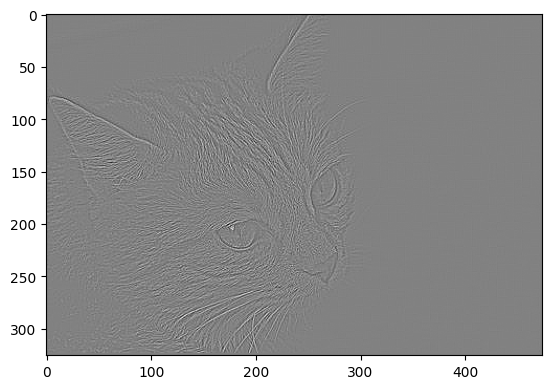

In [4]:
def high_pass_filter(image):
  return(apply_filter(image, np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])))

high_pass_image=high_pass_filter(image)
plt.imshow(high_pass_image, cmap='gray')

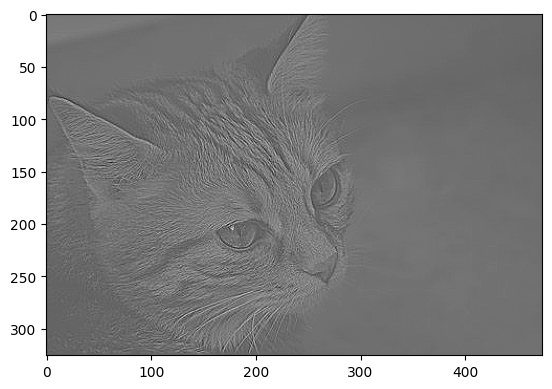

In [5]:
def high_boost_filter(image, A):
  return (A-1)*image + high_pass_filter(image)

hbf=high_boost_filter(image,2)
plt.imshow(hbf,cmap='gray')